In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
train_data_condo = pd.read_csv('data/train_data_condo.csv')

In [4]:
train_data_condo

,Borough,Total Units,Age,Has Elevator,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value
0,2,16,7.0,1,21861.0,410331.0,189972.0,220359.0,1582000.0
1,3,12,9.0,0,24547.0,420981.0,234915.0,186066.0,1380000.0
2,1,6,112.0,0,3800.0,106932.0,36936.0,69996.0,528000.0
3,2,45,23.0,1,63738.0,1082271.0,602961.0,479310.0,3611000.0
4,1,13,7.0,0,24091.0,1015677.0,221396.0,794281.0,6056002.0
...,...,...,...,...,...,...,...,...,...
7995,3,30,15.0,0,34103.0,778571.0,306586.0,471985.0,3718998.0
7996,3,34,92.0,1,36973.0,931574.0,279158.0,652416.0,4956000.0
7997,3,23,10.0,1,29086.0,623022.0,175970.0,447052.0,3484007.0
7998,3,12,26.0,1,15000.0,270150.0,118050.0,152100.0,1143000.0


In [5]:
train_data_condo.dtypes

Borough                     int64
Total Units                 int64
Age                       float64
Has Elevator                int64
Gross SqFt                float64
Estimated Gross Income    float64
Estimated Expense         float64
Net Operating Income      float64
Full Market Value         float64
dtype: object

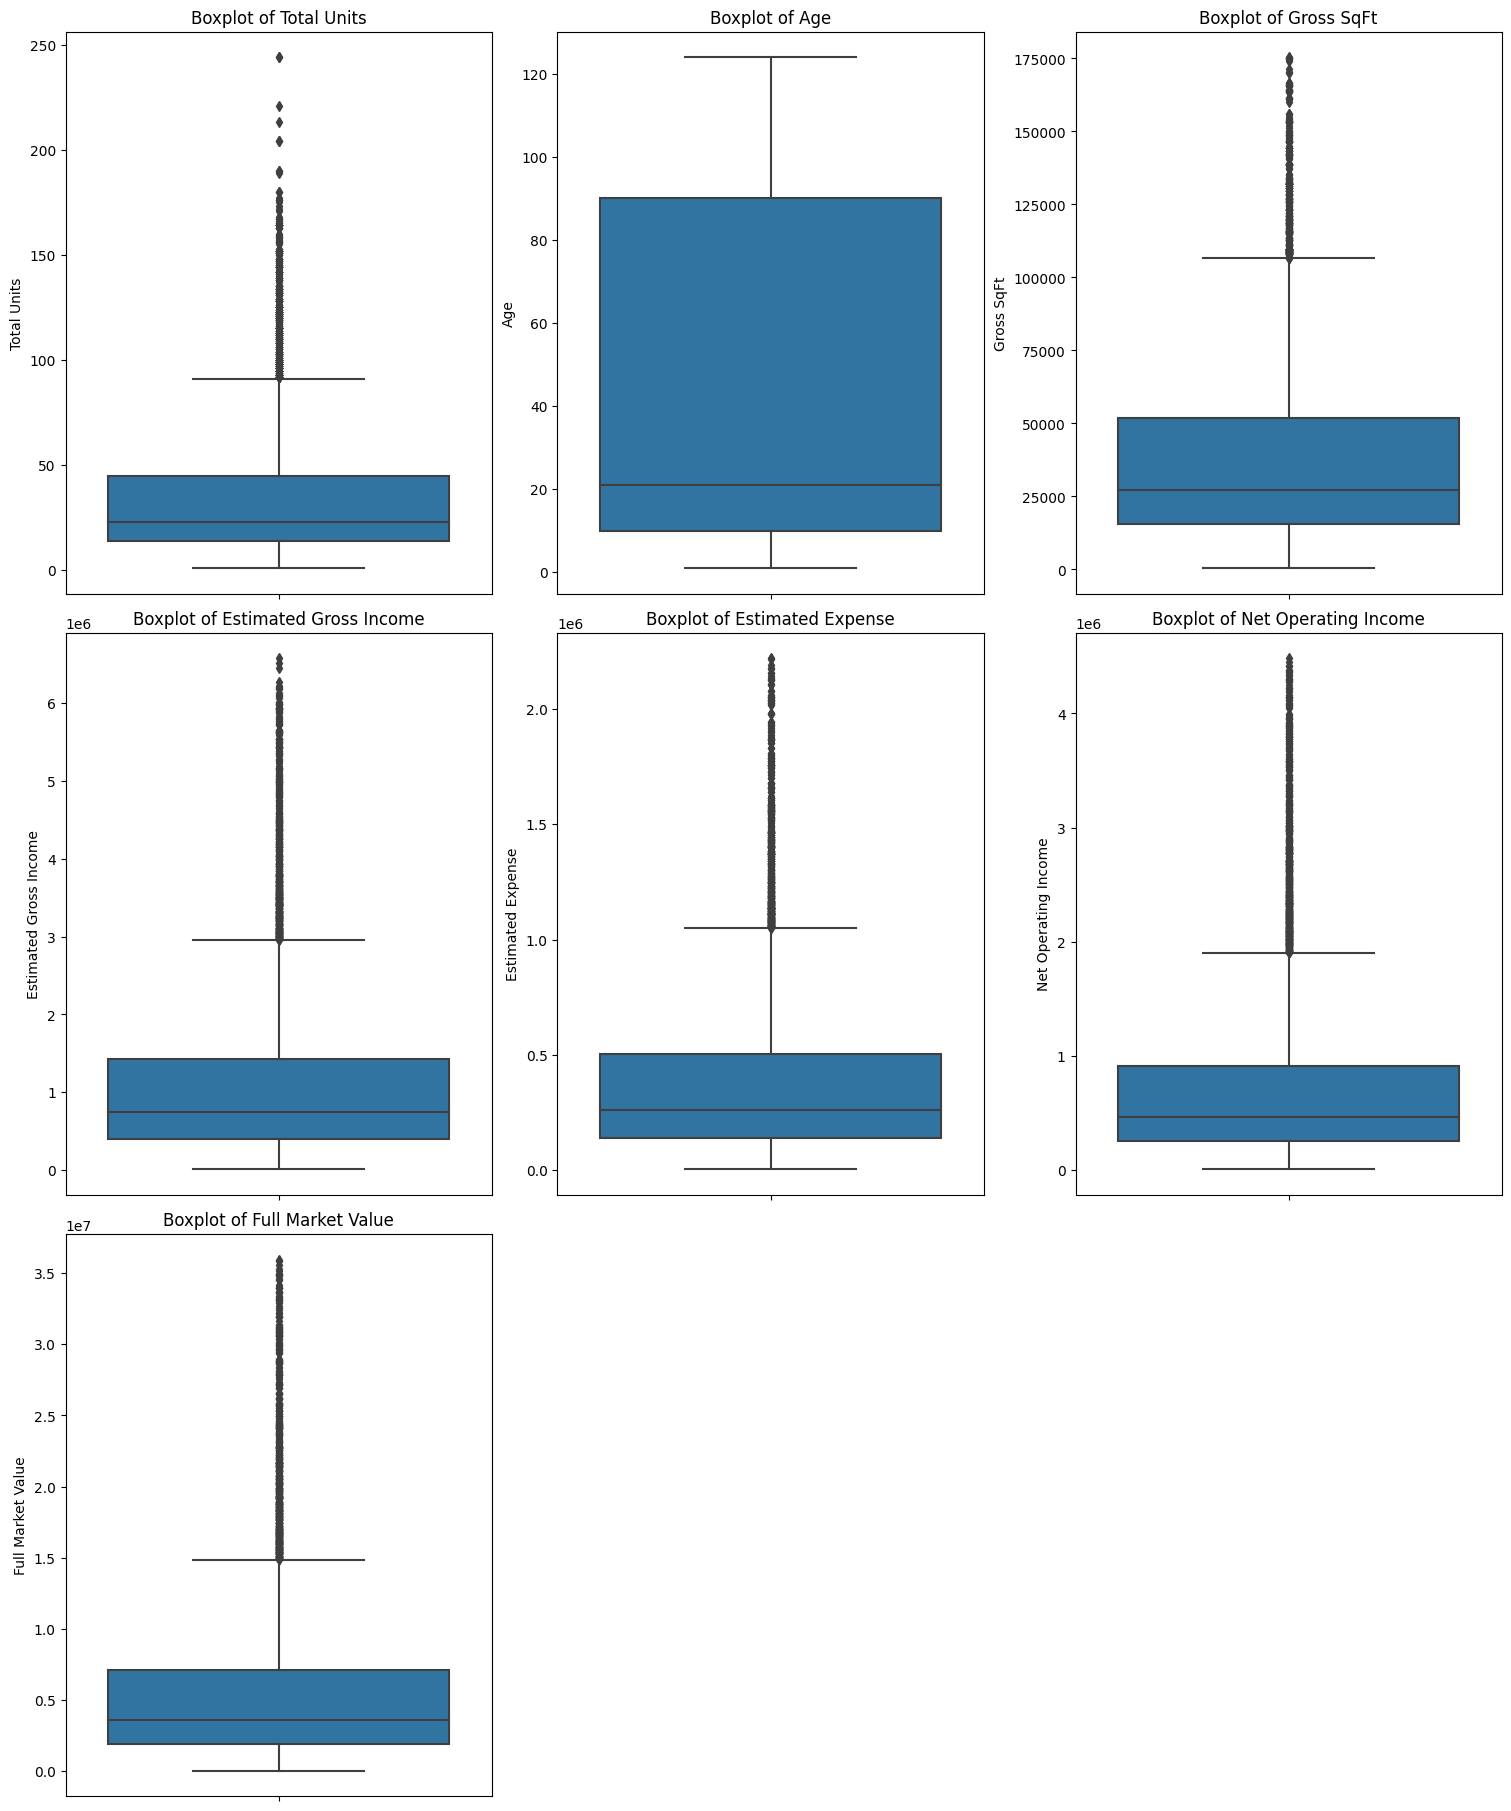

In [11]:
numerical_columns = ['Total Units', 'Age', 'Gross SqFt', 'Estimated Gross Income',
                        'Estimated Expense', 'Net Operating Income', 'Full Market Value']

num_cols = 3  
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(5 * num_cols, 6 * num_rows), constrained_layout=True)

axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(y=train_data_condo[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


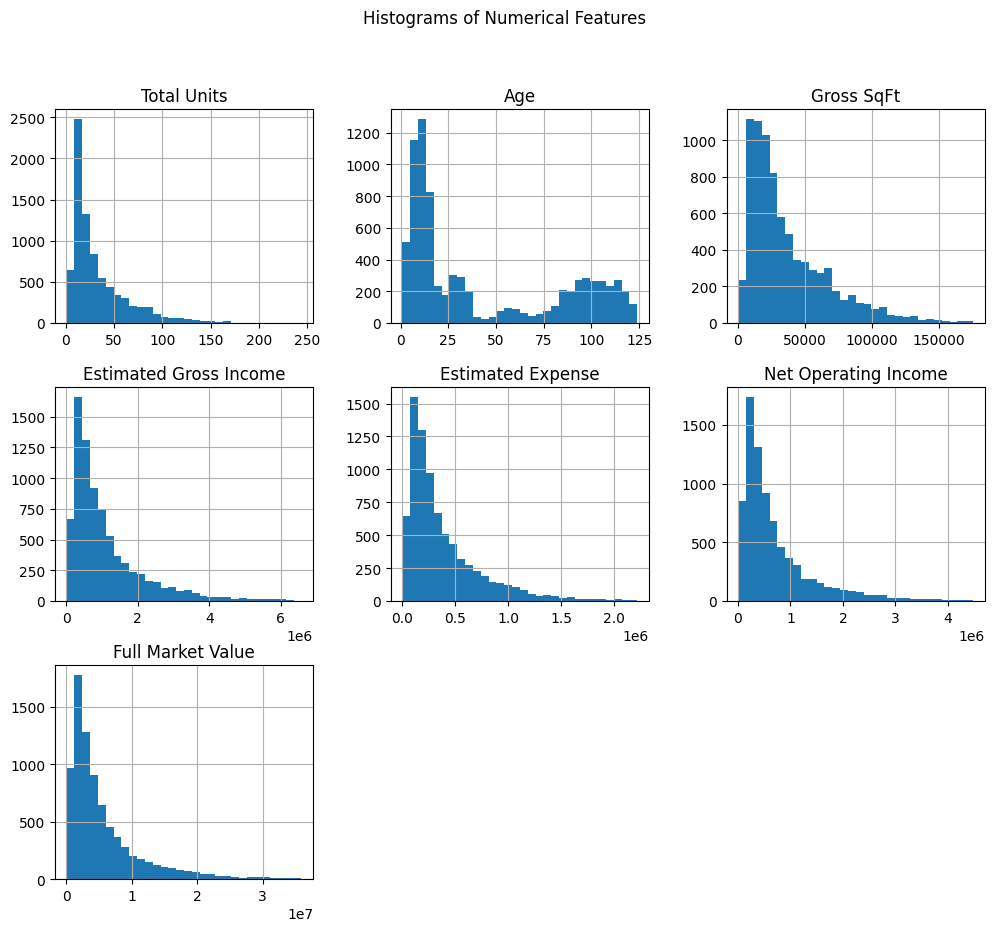

In [13]:
train_data_condo[numerical_columns].hist(figsize=(12, 10), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.show()


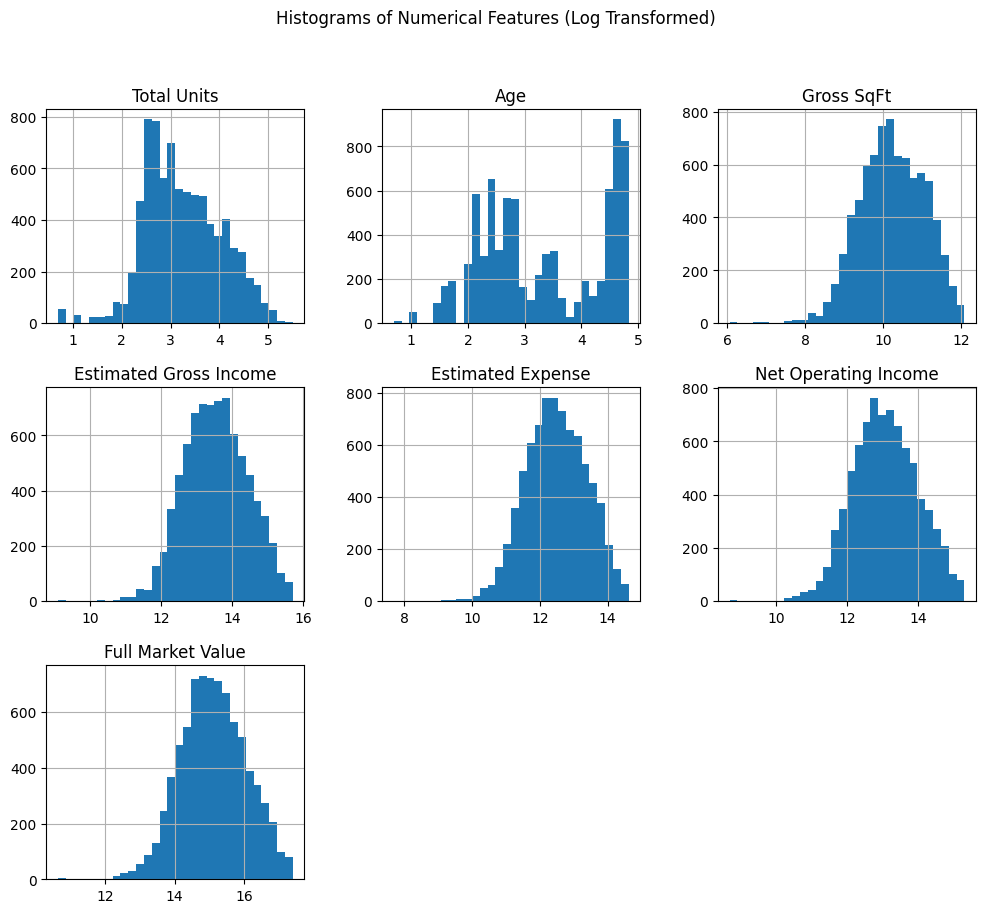

In [17]:
# Apply log transformation to spread out the data
data_log_transformed = train_data_condo.copy()
for col in numerical_columns:
    data_log_transformed[col] = np.log1p(data_log_transformed[col])  # Use log1p to handle zeros

# Generate histograms for each numerical variable without outliers and with log transformation
data_log_transformed[numerical_columns].hist(figsize=(12, 10), bins=30)
plt.suptitle('Histograms of Numerical Features (Log Transformed)')
plt.show()


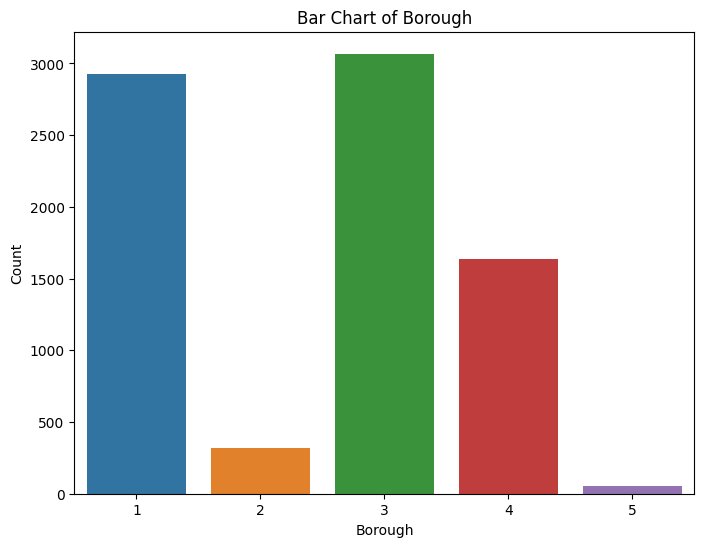

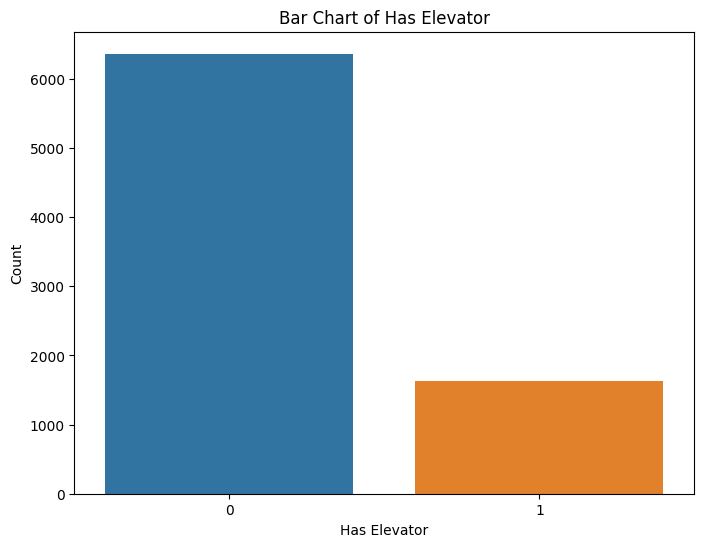

In [19]:
categorical_columns = ['Borough', 'Has Elevator']

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=train_data_condo)
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


Categorical variables will be treated as numerical values otherwise. Regression model, and ANOVA calculations don't accept categorical values. This is why we only convert to categorical here

In [25]:
train_data_condo['Borough'] = train_data_condo['Borough'].astype('category')
train_data_condo['Has Elevator'] = train_data_condo['Has Elevator'].astype('category')

# Separate numerical and categorical columns
numerical_columns = ['Total Units', 'Age', 'Gross SqFt', 'Estimated Gross Income',
                     'Estimated Expense', 'Net Operating Income', 'Full Market Value']
categorical_columns = ['Borough', 'Has Elevator']

summary_stats_numerical = train_data_condo[numerical_columns].describe()
summary_stats_categorical = train_data_condo[categorical_columns].describe()
summary_stats_numerical

,Total Units,Age,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value
count,8000.000000,8000.000000,8000.00000,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03
mean,34.013250,44.182125,37526.84750,1.105793e+06,3.837075e+05,7.220857e+05,5.646184e+06
std,30.236329,40.862668,30270.95204,1.038718e+06,3.522345e+05,7.188740e+05,5.737116e+06
min,1.000000,1.000000,426.00000,8.848000e+03,2.189000e+03,5.827000e+03,4.200000e+04
25%,14.000000,10.000000,15410.00000,4.024728e+05,1.399260e+05,2.510372e+05,1.931000e+06
50%,23.000000,21.000000,27046.00000,7.479820e+05,2.601015e+05,4.673010e+05,3.608000e+06
75%,45.000000,90.000000,51856.25000,1.426372e+06,5.031850e+05,9.129978e+05,7.111498e+06
max,244.000000,124.000000,175387.00000,6.575772e+06,2.220096e+06,4.481043e+06,3.594600e+07


In [26]:
summary_stats_categorical

,Borough,Has Elevator
count,8000,8000
unique,5,2
top,3,0
freq,3068,6363


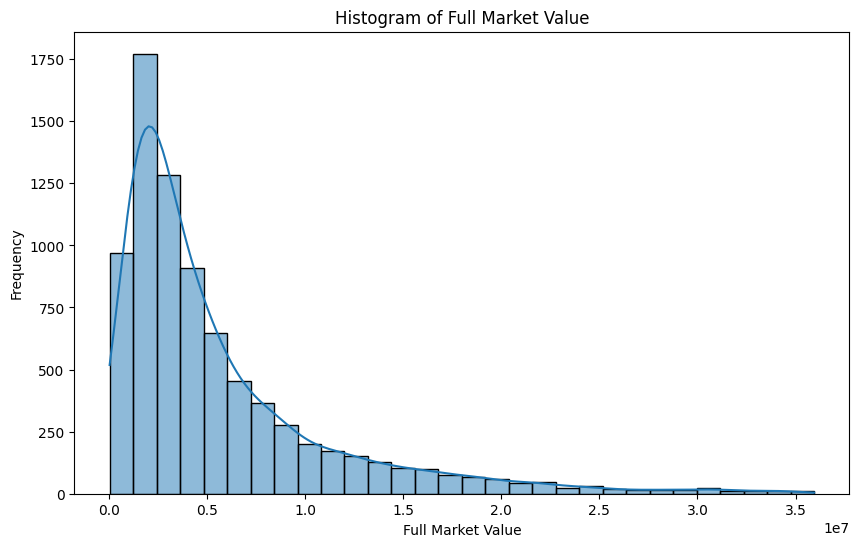

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data_condo['Full Market Value'], bins=30, kde=True)
plt.title('Histogram of Full Market Value')
plt.xlabel('Full Market Value')
plt.ylabel('Frequency')
plt.show()

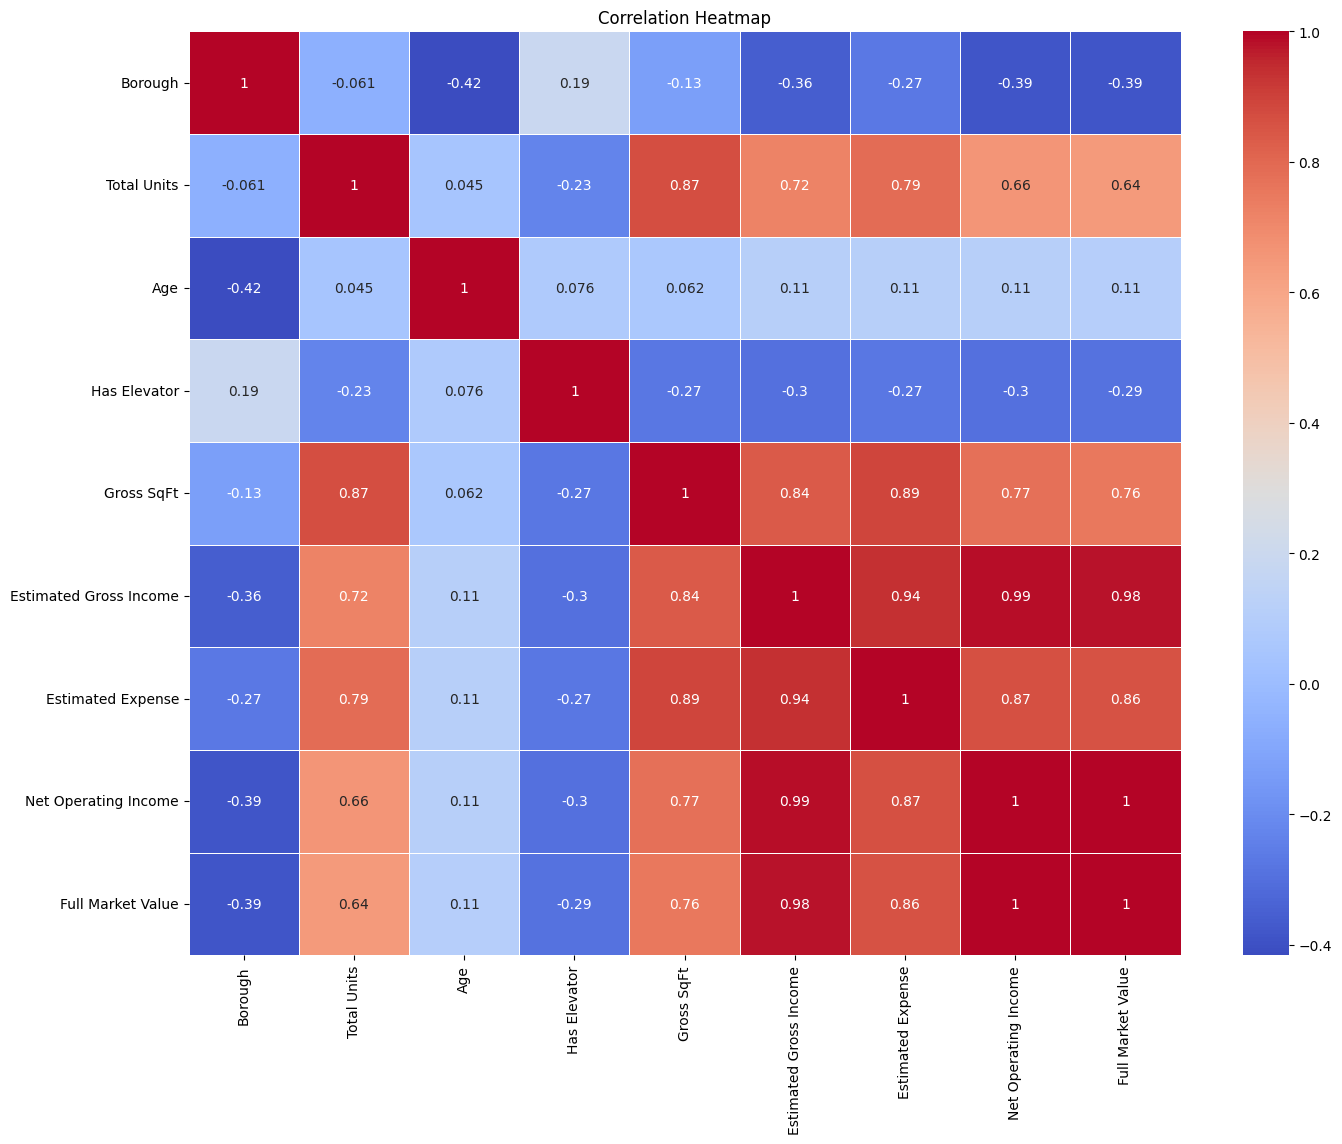

In [28]:

# Create a correlation heatmap
plt.figure(figsize=(16, 12))
corr_matrix = train_data_condo.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
